In [1]:
import csv

import matplotlib.pyplot as plt

import numpy as np

import matplotlib.pyplot as plt

import scipy.interpolate

from scipy.interpolate import splev, splrep

from scipy.interpolate import UnivariateSpline

/home/idies/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/idies/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
Energy = []
Flux = []

In [3]:
with open('C2.csv') as Cfile:
    read = csv.reader(Cfile, delimiter = ',')
    line_count = 0
    
    for row in read:
        if line_count == 0:
                #print(row[0],row[1])
                line_count += 1
        if 0 < line_count < 32:
            #print(row[0],row[1])
            Energy.append(row[0])
            Flux.append(row[1])
            line_count += 1
        else:
            break
Energy.remove(Energy[0])
Flux.remove(Flux[0])

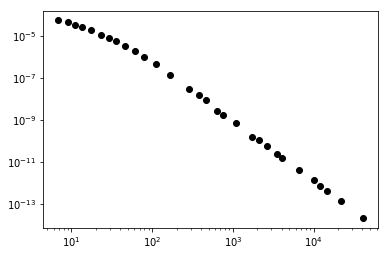

In [4]:
Energy = np.array(Energy, dtype = float)
Flux = np.array(Flux, dtype = float)

plt.loglog(Energy, Flux,'ok')

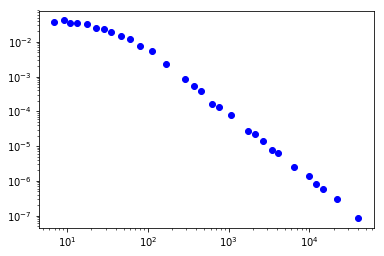

In [5]:
TC_Flux = Flux * 10**4        #True Carbon Flux
TB_Flux = TC_Flux * 10**-2    #True Beryllium Flux
EF  = []

for i in range(0,len(TB_Flux)):
    EF.append(TB_Flux[i] * Energy[i])
    
plt.loglog(Energy, EF,'ob')

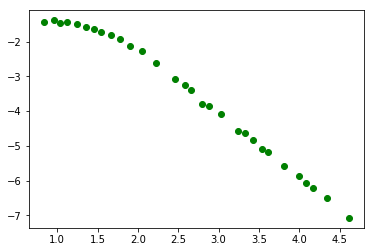

In [6]:
LE = np.log10(Energy)
LEF = np.log10(EF)

plt.plot(LE, LEF,'og')

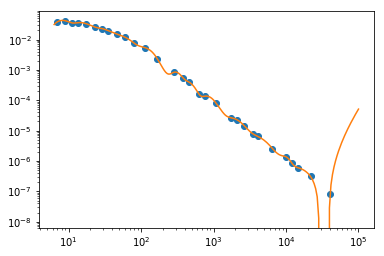

In [7]:
spl = splrep(Energy, EF)
x2 = np.logspace(0.8, 5, 200, base = 10)
y2 = splev(x2, spl)
plt.loglog(Energy, EF, 'o', x2, y2)
plt.show()


In [9]:
MinG = .84
MaxG = 1.24
Uspl = UnivariateSpline(Energy, Flux)

I = Uspl.integral(10,1000)

print(I * MinG * 7 * 24 * 3600)
print(I * MaxG * 7 * 24 * 3600)

4935.5132473356525
7285.75765082882


In [10]:
E1=np.linspace(LE[0],LE[7],num = 100)
E2=np.linspace(LE[7],LE[29],num = 100)

X1=[]
X2=[]
Y1=[]
Y2=[]

for i in range(0,len(LE)):
    if i <= 7:
        X1.append(LE[i])
        Y1.append(LEF[i])
    else:
        X2.append(LE[i])
        Y2.append(LEF[i])

X1 = np.array(X1)
X2 = np.array(X2)
Y1 = np.array(Y1)
Y2 = np.array(Y2)

In [11]:
m1 = (len(X1)*np.sum(X1*Y1)-np.sum(X1)*np.sum(Y1))/(len(X1)*np.sum(X1*X1)-np.sum(X1)**2)
b1 = (np.sum(Y1)-m1*np.sum(X1))/len(X1)
m2 = (len(X2)*np.sum(X2*Y2)-np.sum(X2)*np.sum(Y2))/(len(X2)*np.sum(X2*X2)-np.sum(X2)**2)
b2 = (np.sum(Y2)-m2*np.sum(X2))/len(X2)

def predict1(Energy):
    return m1*Energy+b1
def predict2(Energy):
    return m2*Energy+b2


print(m1,m2)
print(b1,b2)

-0.4355586424625904 -1.8164541629732958
-0.9935500561545212 1.3603196694525677


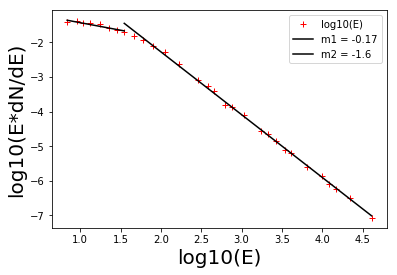

In [12]:
plt.plot(LE,LEF,'+r', label = 'log10(E)')
plt.plot(E1,predict1(E1),'k',label = 'm1 = -0.17')
plt.plot(E2,predict2(E2),'k', label = 'm2 = -1.6')
plt.legend(loc='upper right')
plt.xlabel('log10(E)',fontsize = 20)
plt.ylabel('log10(E*dN/dE)',fontsize = 20)
params = {'legend.fontsize':20}

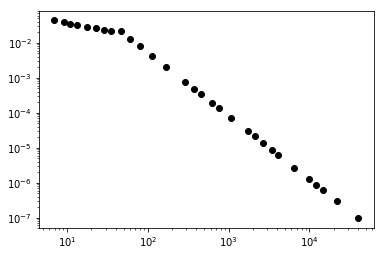

In [13]:
A1 = 10**b1
A2 = 10**b2

P1 = []
P2 =[]

for i in range(0,len(X1)):
    P1.append(A1*Energy[i]**m1)
    #P1.append(10**X[i])
    
for i in range(8,len(Energy)):
    P2.append(A2*Energy[i]**m2)
    #P2.append(10**X2[i])
    
#print(A1,A2)
plt.loglog(10**X1,P1,'ok',10**X2,P2,'ok')


In [14]:
Cp1 = 0
Cp2 = 0

Cp3 = 0
Cp4 = 0

MinG = 0.84
MaxG = 1.24

dlogE = (1.61-0.87)/((len(E1)-23))
dlogE2 = (4.6-1.55)/(len(E2)-52)
                
for i in range((len(E1)-23),len(E1)):
    Cp1 = Cp1+(A1*(10**E1[i])**m1)*MinG*dlogE
    Cp3 = Cp3+(A1*(10**E1[i])**m1)*MaxG*dlogE
                
for i in range(0,len(E1)-52):
    Cp2 = Cp2+(A2*(10**E2[i])**m2)*MinG*dlogE2
    Cp4 = Cp4+(A2*(10**E2[i])**m2)*MaxG*dlogE2
    
#The odd thing about the first time I wrote up the code was that I multiplied the entire thing by dlogE which actually means that
#if I don't divide by .103 the amount of events is lower than these number but not by much
    
Cmin = Cp1 + Cp2
Cmax = Cp3 + Cp4
print(Cmin,Cmax)


print(E2)

0.019950582709828746 0.02945086019069958
[1.54640129 1.57733527 1.60826926 1.63920325 1.67013724 1.70107123
 1.73200522 1.7629392  1.79387319 1.82480718 1.85574117 1.88667516
 1.91760914 1.94854313 1.97947712 2.01041111 2.0413451  2.07227908
 2.10321307 2.13414706 2.16508105 2.19601504 2.22694902 2.25788301
 2.288817   2.31975099 2.35068498 2.38161896 2.41255295 2.44348694
 2.47442093 2.50535492 2.5362889  2.56722289 2.59815688 2.62909087
 2.66002486 2.69095884 2.72189283 2.75282682 2.78376081 2.8146948
 2.84562878 2.87656277 2.90749676 2.93843075 2.96936474 3.00029873
 3.03123271 3.0621667  3.09310069 3.12403468 3.15496867 3.18590265
 3.21683664 3.24777063 3.27870462 3.30963861 3.34057259 3.37150658
 3.40244057 3.43337456 3.46430855 3.49524253 3.52617652 3.55711051
 3.5880445  3.61897849 3.64991247 3.68084646 3.71178045 3.74271444
 3.77364843 3.80458241 3.8355164  3.86645039 3.89738438 3.92831837
 3.95925235 3.99018634 4.02112033 4.05205432 4.08298831 4.11392229
 4.14485628 4.17579027

Fix the bounds of the integration in the cell Above!!

In [15]:
print(Cmin*7*24*3600)
print(Cmax*7*24*3600)

12066.112422904425
17811.880243335105
